# Life Insurance Case Study

---
# **Table of Contents**
---
1. [**Introduction**](#Section1)<br>
    - 1.1 [**Key Advantages of life Insurance**](#Section101)<br>
    - 1.2 [**What exactly is underwriting?**](#Section102)<br> 
2. [**Problem Statement**](#Section201)
3. [**Data Description**](#Section301)
4. [**Importing Packages**](#Section401)
5. [**FeatureEngineering**](#Section501)
    - 5.1 [**Working with Missing Values**](#Section502)
    - 5.2 [**Setting Index to Dataframe**](#Section503)
    - 5.3 [**Transforming Product_Info_2 Column**](#Section504)
    - 5.4 [**Analysis of Weight, Height, BMI and Age features**](#Section505)
    - 5.5 [**Analysis of Response Variable**](#Section506)
    - 5.6 [**Converting the Multiclass problem into Binary class problem**](#Section507)
    - 5.7 [**Categorizing BMI,AGE,HEIGHT and WEIGHT based on their values**](#Section508)
    - 5.8 [**Deriving the new feature called Risk Status**](#Section509)
    - 5.9 [**Transforming BMI_Wt, Age_Class, Weight_Class, High_Risk_Status and     Low_Risk_Status into numerical**](#Section510)
6. [**Model Creation**](#Section601)
    - 6.1 [**Implementing Logistic Regression**](#Section602)
    - 6.2 [**Implementing Decission Tree**](#Section603)
    - 6.3 [**Implementing Random Forest**](#Section604)
7. [**Model Comparission**](#Section701)


<a name = Section1></a>
# Introduction

<br> </br>

## What is life insurance
Life insurance is important, as it protects your family and lets you leave them a non-taxable amount at the time of death. It is also used to cover your mortgage and your personal loans, such as your car loan. Your individual life insurance follows you when you retire and you are no longer insured by your employer. This insurance will also replace your family income when resources are less so they can maintain their quality of life.

<br> </br>


<a name = Section101></a>
## Key Advantages of life Insurance 

- **Death Benefits** <br> </br>
Life insurance enables individuals to protect themselves and their families, in case of any unfortunate happening in the life of the insured. The insurer pays an amount equivalent to the sum assured as specified in the contract along with applicable bonuses. This is know as the death benefit.


- **Investment Components**<br> </br>
Certain whole life insurance policies offer two-pronged benefits of both insurance and investment. While one half of your premium is paid toward insurance, the other half is invested in equity, debt or combinations of both. You get the best of both worlds with a protective covering as well as high returns on your investments. You can make the most of this component by investing in funds that align with your investment horizon and risk appetite. Certain policies allow you to switch between funds as per your evolving goals. 


- **Maturity Benefits**<br> </br>
Life insurance policies can also double as a savings instrument by offering maturity benefits. If the insured survives the policy term and no claims have been made, the total premiums paid are returned at the time of maturity of the policy. In this manner, your life insurance plan can have a savings component, while also offering a protective cover.


- **Tax Benefits**<br> </br>
Under the umbrella of Section 80C of the Income Tax Act (ITA), individuals can reduce their tax liabilities by investing in specific instruments. Term insurance is one of them. Under section 80C, the premium paid for your life insurance policy is eligible to attain a maximum tax deduction for up to Rs. 1.5 lakh. In addition to this, under Section 10(10D), any payouts you receive from your insurance policy are completely tax-free (provided your premium does not exceed 10% of your Sum Assured, annually). If you have opted for a health-related rider, such as a critical illness or surgical care rider, you can also avail tax deductions under 80D of the ITA.

- **Coverage Against Liabilities**<br> </br>
To fulfill your dreams and attain your goals, you may have required a certain amount of financial support - in the form of loans, mortgages and other types of debt. Be it student loans or credit card debt, dealing with such liabilities can be a source of great financial strain, without a steady stream of income. While you may have the funds to pay off a part of your loans now, your family may find it difficult to manage such liabilities in the event of your unfortunate demise, owing to the loss of income. Thus, taking a life insurance policy ensures that your family has the financial means to steadily meet your loan and mortgage repayments, even in your absence.

<br> </br>

<a name = Section102></a>
## What exactly is underwriting?
Underwriting is a term used to describe the consideration given to a life insurance application, to determine whether a policy applied for should be issued or there are changes to be made depending on the person’s risk profile. The process helps in the selection of risks for the insurance company involved in issuance of an insurance policy to the person in question.

Underwriters are the risk managers of the organization. They help the organization to keep actual experience within the mortality assumption used in calculating the premium rates, which helps the company to offer insurance cover at competitive terms, maintain equity between policyholders, and offer cover to as wide a group of lives as possible.

[![](https://www.canarahsbclife.com/content/dam/choice/blog-inner/images/underwriting-Process.jpg)](https://www.canarahsbclife.com/content/dam/choice/blog-inner/images/underwriting-Process.jpg)


<a name = Section201></a>
# Problem Statement

In this dataset, we are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels.

We will do a binary classification by altering the target variable. Based on the attributes of customers, will the life insurance policy be approved or not i.e.yes(1) or no(0).we will turn this Multiclass classification into Binary classification.
We are making 0 to 7 as one class (0 - which mean approved with additional terms and conditions or rejected) and 8 as another class (1 - which means approved)


<a name = Section301></a>
# Data Description

<br>  </br>

| Feature  | Description  |
| ------------ | ------------ |
| Id  | A unique identifier associated with an application.  |
| Product_Info_1-7  | A set of normalized variables relating to the product applied for  |
| Ins_Age  | Normalized age of applicant  |
| Ht  | Normalized height of applicant  |
| Wt   | Normalized weight of applicant  |
| BMI   | Normalized BMI of applicant  |
| Employment_Info_1-6  |  A set of normalized variables relating to the employment history of the applicant. |
| InsuredInfo_1-6  |  A set of normalized variables providing information about the applicant.  |
| Insurance_History_1-9  |  A set of normalized variables relating to the insurance history of the applicant. |
| Family_Hist_1-5  |  A set of normalized variables relating to the family history of the applicant. |
| Medical_History_1-41  | A set of normalized variables relating to the medical history of the applicant.  |
| Medical_Keyword_1-48  |  A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application. |
|Response | This is the target variable, an ordinal variable relating to the final decision associated with an application  |

<a name = Section401></a>
# Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                            # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport        # Import Pandas Profiling (To generate Univariate Analysis)
import numpy as np
#-------------------------------------------------------------------------------------------------------------------------------
# allow plots to appear directly in the notebook
%matplotlib inline                                         # To display the plots in Jupyter notebook

plt.rcParams['figure.figsize'] = 12, 7
import warnings
warnings.filterwarnings('ignore')                 # To filter out any warnings aspart of version updates
sns.set_style('darkgrid')
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, \
                                             recall_score, f1_score, roc_curve, make_scorer, auc, roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.model_selection import cross_val_score

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

In [2]:
# Load the data from csv file to dataframe

data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv')

In [3]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


The following variables are all categorical (nominal):


Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

<br>

The following variables are continuous:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

<br>


The following variables are discrete:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

<br>

Medical_Keyword_1-48 are dummy variables.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [6]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


<a name = Section501></a>
# Feature Engineering

<a name = Section502></a>
## Working on Missing Values

In [7]:
# Extracting the total missing values and their percentage in each feature

missing_data = pd.DataFrame(data.isnull().sum(), columns=['Total Missing Values'])
missing_data['% of Missing Values'] = data.isnull().sum() / len(data) * 100
missing_data = missing_data.sort_values(by = '% of Missing Values' , ascending=False)
missing_data

,Total Missing Values,% of Missing Values
Medical_History_10,58824,99.061990
Medical_History_32,58274,98.135767
Medical_History_24,55580,93.598963
Medical_History_15,44596,75.101463
Family_Hist_5,41811,70.411411
...,...,...
Medical_History_6,0,0.000000
Medical_History_5,0,0.000000
Medical_History_4,0,0.000000
Medical_History_3,0,0.000000


In [8]:
# Extracting the columns which has more than 70% missing information

top_missing_data_columns = missing_data[missing_data['% of Missing Values'] > 70]
print(top_missing_data_columns)
print()
print('There are {} columns with more than 70% of missing values'.format(len(top_missing_data_columns)))

                    Total Missing Values  % of Missing Values
Medical_History_10                 58824            99.061990
Medical_History_32                 58274            98.135767
Medical_History_24                 55580            93.598963
Medical_History_15                 44596            75.101463
Family_Hist_5                      41811            70.411411

There are 5 columns with more than 70% of missing values


### Dropping off above columns from the dataframe as they are having more than 70% missing values

In [9]:
top_missing_data_columns.index

Index(['Medical_History_10', 'Medical_History_32', 'Medical_History_24',
       'Medical_History_15', 'Family_Hist_5'],
      dtype='object')

In [10]:
data.drop(columns= top_missing_data_columns.index, inplace=True)

In [11]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [12]:
# Finding the missing values in remaining features

missing_data_columns = data.columns[data.isnull().sum() > 0]
missing_data_columns

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Medical_History_1'],
      dtype='object')

### Replacing the Missing values 
- For Continous variables replacing missing data with median
- For Categorical Variables replacing missing values with mode

In [13]:
# Replacing the missing values with median as all the above features are having continous data

for col in missing_data_columns.to_list():
    data[col] = data[col].fillna(data[col].median())

In [14]:
print('Columns having missing values in the data are :', data.columns[data.isnull().sum() > 0])

Columns having missing values in the data are : Index([], dtype='object')


- Now we have successfully replaced all missing values in data

<a name = Section503></a>
### Set Id as the Index to the dataframe

In [15]:
data.set_index('Id', inplace=True)  # Setting Id column as index to dataframe

In [16]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 122 entries, Product_Info_1 to Response
dtypes: float64(13), int64(108), object(1)
memory usage: 55.7+ MB


<a name = Section504></a>
### Transforming Product_Info_2 column

In [19]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


- Here we will be transforming Product_Info_2 into numeric column using Label Encoding technique

- Here is the reference to [Label Encoding](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd "Label Encoding") which I used to transform the Product_Info_2 feature from Categorical to numerical

In [20]:
data.Product_Info_2.value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

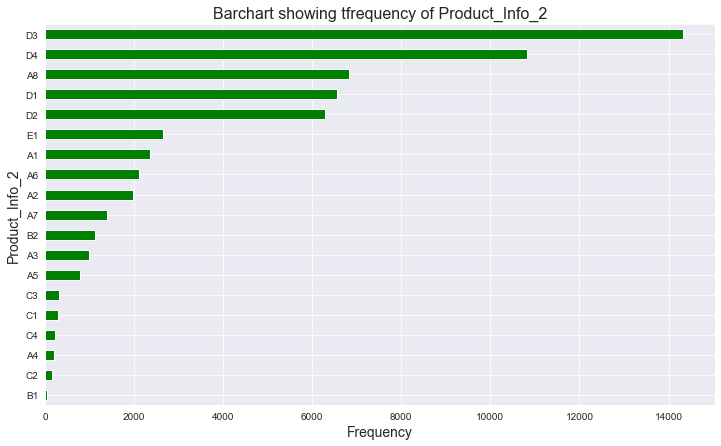

In [21]:
data.Product_Info_2.value_counts().sort_values().plot(kind='barh', color='green')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Product_Info_2', fontsize=14)
plt.title('Barchart showing tfrequency of Product_Info_2', fontsize=16);

In [22]:
# Performing Label Encoding on Product_Info_2
# .cat.codes is used to assign the encoded variable to Product_Info_2 column

data.Product_Info_2 = data.Product_Info_2.astype('category').cat.codes

In [23]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [24]:
data.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Data columns (total 122 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    Product_Info_1       59381 non-null  int64  
 1    Product_Info_2       59381 non-null  int8   
 2    Product_Info_3       59381 non-null  int64  
 3    Product_Info_4       59381 non-null  float64
 4    Product_Info_5       59381 non-null  int64  
 5    Product_Info_6       59381 non-null  int64  
 6    Product_Info_7       59381 non-null  int64  
 7    Ins_Age              59381 non-null  float64
 8    Ht                   59381 non-null  float64
 9    Wt                   59381 non-null  float64
 10   BMI                  59381 non-null  float64
 11   Employment_Info_1    59381 non-null  float64
 12   Employment_Info_2    59381 non-null  int64  
 13   Employment_Info_3    59381 non-null  int64  
 14   Employment_Info_4    59381 non-null  float64
 15   Employment_Info_5

<a name = Section505></a>
### Analysis of Weight, Height, BMI and Age  features

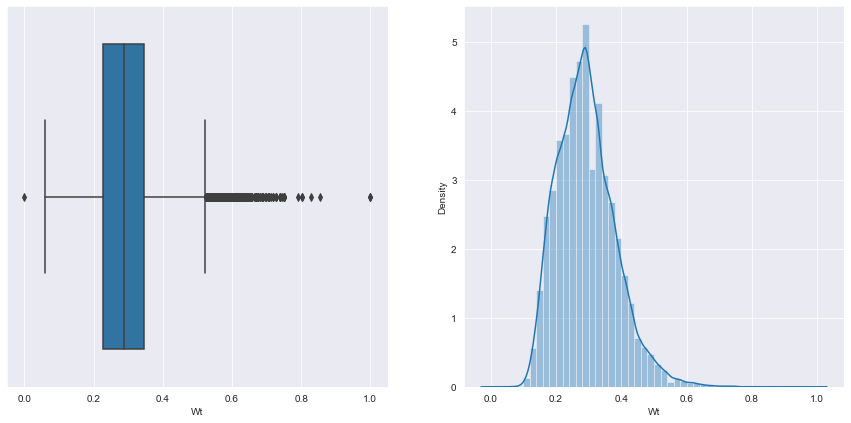

In [25]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Wt', data=data,  ax=axes[0])
sns.distplot(data['Wt'],  ax=axes[1]);

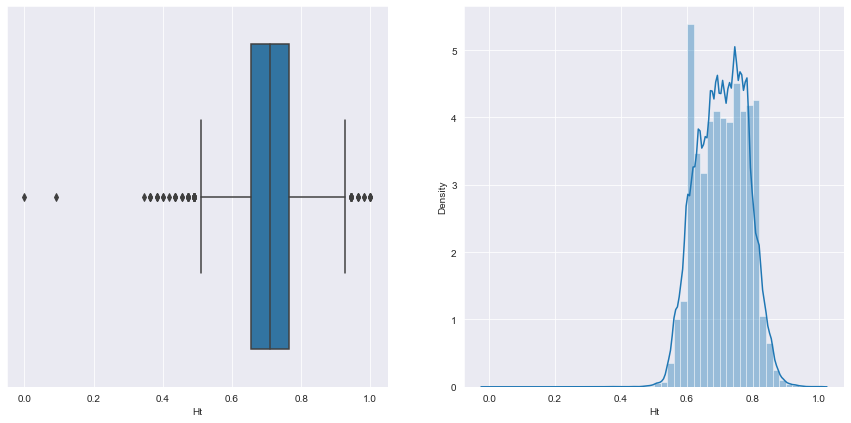

In [26]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ht', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['Ht'],  ax=axes[1]);

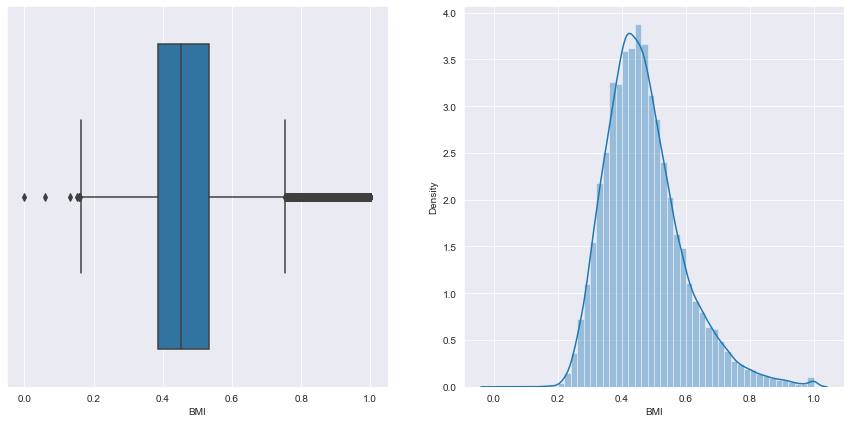

In [27]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'BMI', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['BMI'],  ax=axes[1]);

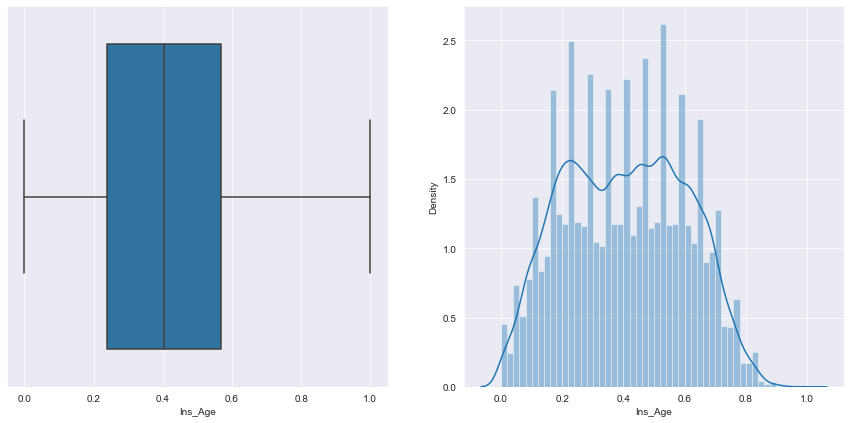

In [28]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ins_Age', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['Ins_Age'],  ax=axes[1]);

<a name = Section506></a>
### Analysis of Response variable

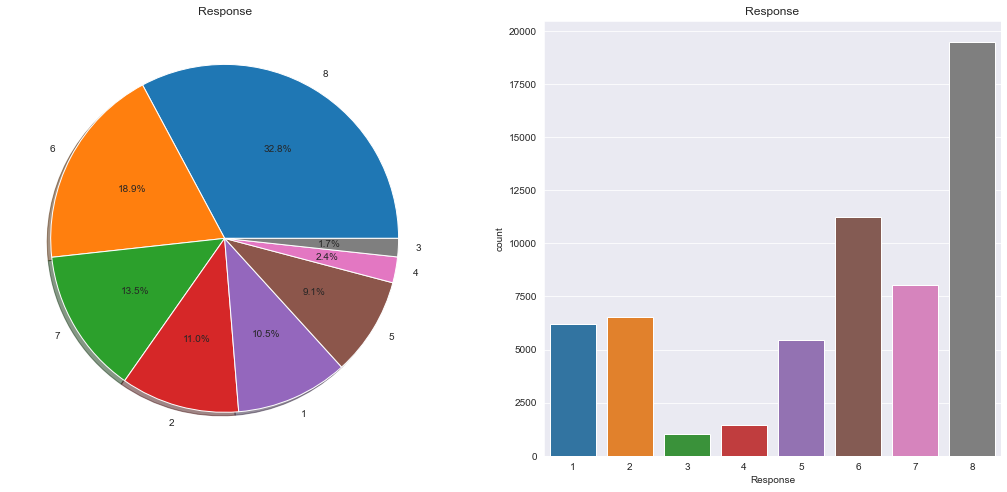

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=data,ax=ax[1])
ax[1].set_title('Response')
plt.show()

We can see that Class 8 has the highest distribution. We will assume this as clean and accepted policies on standard underwriting terms. Rest other classes can be considered as policies rejected or accepted at extra terms and conditions

We will do a binary classification by altering the target variable. We are making 0 to 7 as one class (0 - rejected or accepted at extra terms and conditions) and 8 (1 - Accepted) as another class

<a name = Section507></a>
### Converting the Multiclass problem into Binary class problem

In [30]:
#create a funtion to create new target variable based on conditions
# 0 means rejected or accepted at extra terms and conditions
# 1 means accepted

def new_target(row):
    if (row['Response']<=7):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=2
    return val


In [31]:
data.Response = data.apply(new_target, axis=1)

In [32]:
data.Response.value_counts()

0    39892
1    19489
Name: Response, dtype: int64

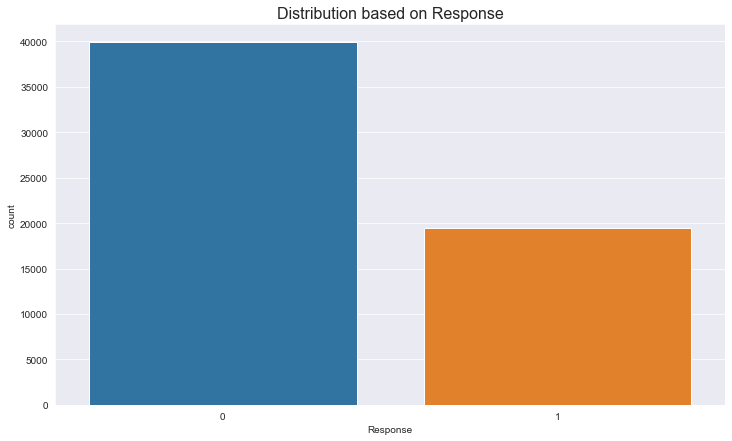

In [33]:
sns.countplot(data.Response)
plt.title('Distribution based on Response', fontsize=16);

In [34]:
# Percentage of classes in the data

data.Response.value_counts() / len(data.Response) * 100

0    67.179738
1    32.820262
Name: Response, dtype: float64

- Since Response feature is nearly balanced we can consider Accuracy as one of the performaance metrics in evaluating our model
- Along with Accuracy we will be also considering Precission, Recall and F1 score to evaluate our models. In this problem statement we are assumng that False positives and False Negatives are having equal importance.

<a name = Section508></a>
### Categorizing BMI,AGE,HEIGHT and WEIGHT based on their values

In [35]:
# BMI Categorization

conditions = [
    (data['BMI'] <= data['BMI'].quantile(0.25)),
    (data['BMI'] > data['BMI'].quantile(0.25)) & (data['BMI'] <= data['BMI'].quantile(0.75)),
    (data['BMI'] > data['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

data = data.assign(BMI_Wt = np.select(conditions, choices))
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average


In [36]:
# Age Categorization

conditions = [
    (data['Ins_Age'] <= data['Ins_Age'].quantile(0.25)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.25)) & (data['Ins_Age'] <= data['Ins_Age'].quantile(0.75)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.75))]

choices = ['young', 'middle_age', 'old']

data = data.assign(Age_Class = np.select(conditions, choices))
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,old
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight,young
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average,young
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,young
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,averag

In [37]:
# Height Categorization

conditions = [
    (data['Ht'] <= data['Ht'].quantile(0.25)),
    (data['Ht'] > data['Ht'].quantile(0.25)) & (data['Ht'] <= data['Ht'].quantile(0.75)),
    (data['Ht'] > data['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

data = data.assign(Height_Class = np.select(conditions, choices))
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class,Height_Class
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,old,short
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight,young,short
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average,young,average
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,young,average
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [38]:
# Weight Categorization

conditions = [
    (data['Wt'] <= data['Wt'].quantile(0.25)),
    (data['Wt'] > data['Wt'].quantile(0.25)) & (data['Wt'] <= data['Wt'].quantile(0.75)),
    (data['Wt'] > data['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

data = data.assign(Weight_Class = np.select(conditions, choices))
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class,Height_Class,Weight_Class
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,old,short,thin
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight,young,short,thin
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average,young,average,average
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,young,average,thin
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0

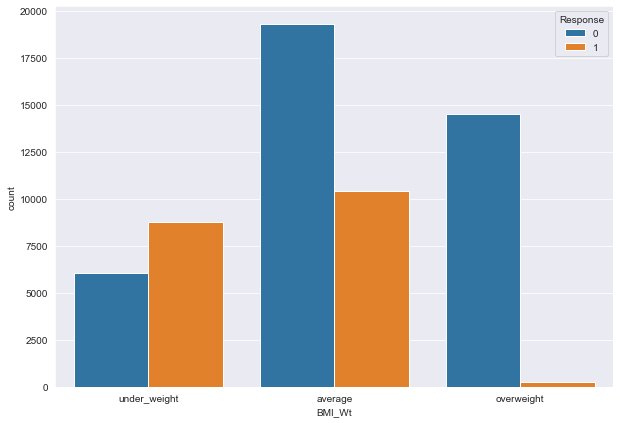

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'BMI_Wt', hue = 'Response', data = data);

- Most of the policies for the overweight category people are either rejected or accepted with additional terms and conditions

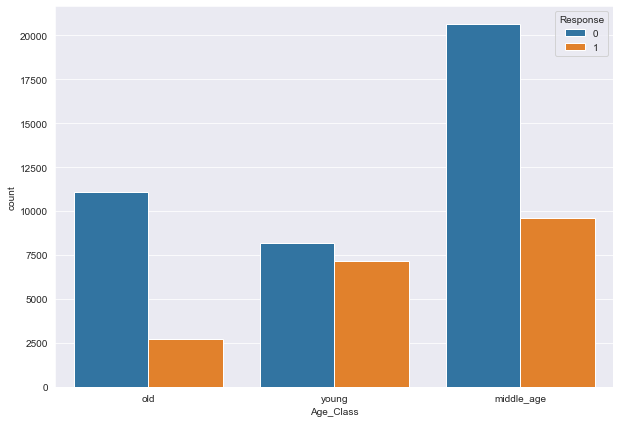

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Age_Class', hue = 'Response', data = data);

- Most of the policies for middle aged and old people are rejected or accepted with additional terms and conditions
- Young aged people have high rate of acceptance of policies with standard terms and conditions compared with other age groups

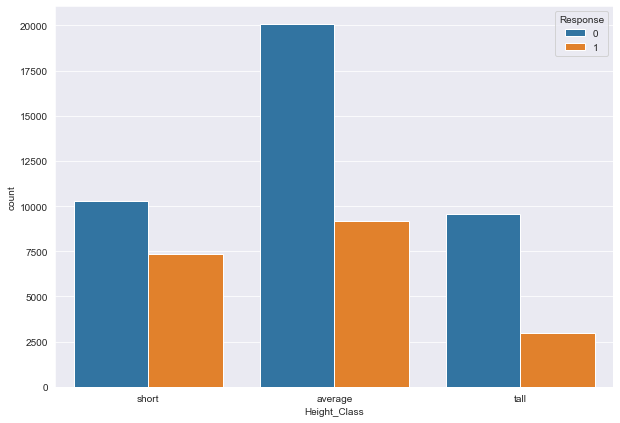

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Height_Class', hue = 'Response', data = data);

- This feature has no consistent behavior with respect to Response variable

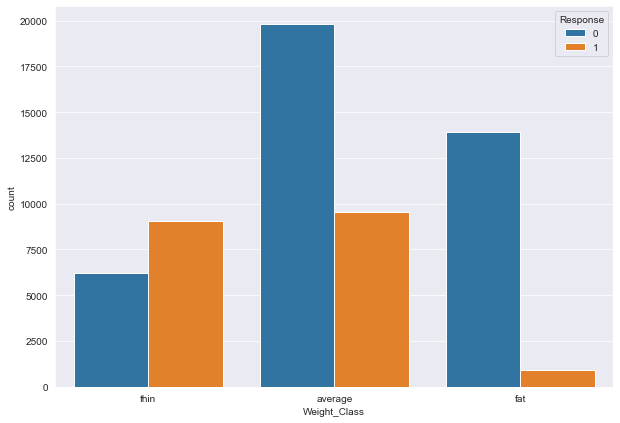

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Weight_Class', hue = 'Response', data = data);

- The policies for people who belong to fat category are either rejected or accepted with additional terms and conditions

<a name = Section509></a>
### Deriving the new feature called Risk Status based on above features

In [50]:
def new_target(row):
    if (row['BMI_Wt']=='overweight') or (row['Age_Class']=='old')  or (row['Weight_Class']=='fat'):
        val='extremely_risky'
    else:
        val='not_extremely_risky'
    return val

data = data.assign(High_Risk_Status = data.apply(new_target,axis=1))
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class,Height_Class,Weight_Class,Average_Risk_Status,High_Risk_Status
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,old,short,thin,non_average,extremely_risky
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight,young,short,thin,non_average,not_extremely_risky
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average,young,average,average,average,not_extremely_risky
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,young,average,thin,non_average,not_extremely_risky
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,

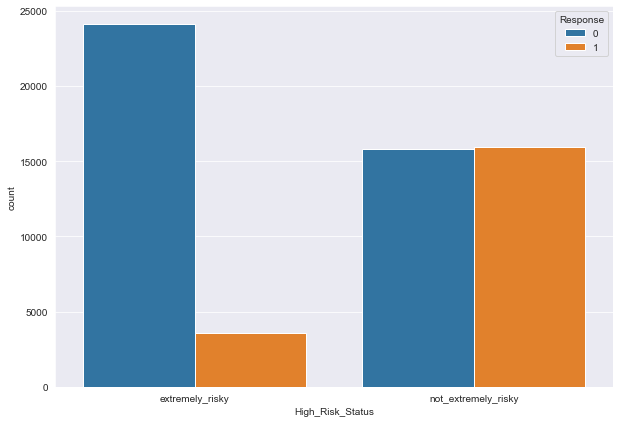

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'High_Risk_Status', hue = 'Response', data = data);

- The policies which are categorized as extremely risky are either rejected or accepted with additional terms and conditions

In [49]:
def new_target(row):
    if (row['BMI_Wt']=='average') or (row['Age_Class']=='average')  or (row['Weight_Class']=='average'):
        val='average'
    else:
        val='non_average'
    return val

data = data.assign(Average_Risk_Status = data.apply(new_target,axis=1))
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class,Height_Class,Weight_Class,Average_Risk_Status
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,old,short,thin,non_average
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight,young,short,thin,non_average
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average,young,average,average,average
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,young,average,thin,non_average
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,

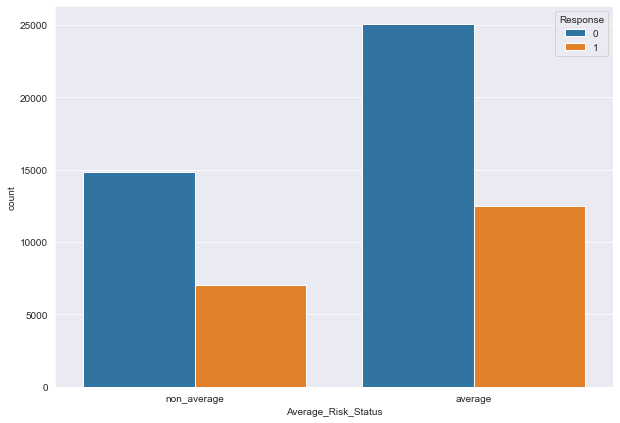

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Average_Risk_Status', hue = 'Response', data = data);

- There is no behaviour that can be extracted from the above plot 

In [52]:
def new_target(row):
    if (row['BMI_Wt']=='under_weight') or (row['Age_Class']=='young')  or (row['Weight_Class']=='thin'):
        val='low_end'
    else:
        val='non_low_end'
    return val

data = data.assign(Low_Risk_Status = data.apply(new_target,axis=1))
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class,Height_Class,Weight_Class,Average_Risk_Status,High_Risk_Status,Low_Risk_Status
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,old,short,thin,non_average,extremely_risky,low_end
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight,young,short,thin,non_average,not_extremely_risky,low_end
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average,young,average,average,average,not_extremely_risky,low_end
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,young,average,thin,non_average,not_extremely_risky,low_end
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.

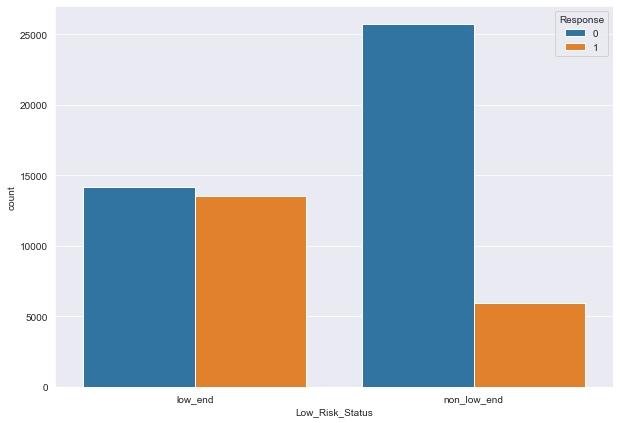

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Low_Risk_Status', hue = 'Response', data = data);

- Under non low end risk most of the policies are either rejected or accepted with additional terms and conditions

### Since Average_Risk_Status and Height_Class are not adding any additinal information to predict Response we are dropping off these columns

In [55]:
data.drop(columns=['Height_Class',  'Average_Risk_Status'], inplace=True)

In [56]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class,Weight_Class,High_Risk_Status,Low_Risk_Status
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,old,thin,extremely_risky,low_end
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,under_weight,young,thin,not_extremely_risky,low_end
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average,young,average,not_extremely_risky,low_end
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,under_weight,young,thin,not_extremely_risky,low_end
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.

<a name = Section510></a>
### Transforming BMI_Wt, Age_Class, Weight_Class, High_Risk_Status and Low_Risk_Status into numerical using Label Encoding

In [57]:
transform_columns = ['BMI_Wt', 'Age_Class', 'Weight_Class', 'High_Risk_Status', 'Low_Risk_Status']

In [58]:
for col in transform_columns:
    data[col] = data[col].astype('category').cat.codes
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,BMI_Wt,Age_Class,Weight_Class,High_Risk_Status,Low_Risk_Status
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,0,0
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,0
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,1,0
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [59]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_afterb_preprocessing.html

profile = data.profile_report(title="Insurance Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="Insurance_profiling_after_preprocessing.html")

<a name = Section601></a>
# Model Creation

- We will be using Logistic Regression, Decissio Tree Classifier and Random Forest Classifier and will be comparing the performance metrics to get the best model

In [60]:
X = data.loc[:, data.columns != 'Response']

In [61]:
X.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,BMI_Wt,Age_Class,Weight_Class,High_Risk_Status,Low_Risk_Status
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.463768,0.598039,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0
5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.519608,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,0
6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,0.000973,3,2,3,3,0.304348,0.519608,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,0.000973,3,2,3,3,0.420290,0.519608,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,0
8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,0.000973,3,2,3,2,0.463768,0.519608,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
y = data.Response

In [63]:
y.head()

Id
2    1
5    0
6    1
7    1
8    1
Name: Response, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47504, 126)
(47504,)
(11877, 126)
(11877,)


<a name = Section602></a>
### Implementing [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc "Logistic Regression") algorithm

In [66]:
lr_model1 = LogisticRegression(random_state=0)

In [67]:
lr_model1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [68]:
y_pred_train = lr_model1.predict(X_train)

In [69]:
y_pred_test = lr_model1.predict(X_test)

In [70]:
def performance_metrics(X_test=X_test, y_test=y_test,*, model,  y_pred_test, algorithm):
    
    '''
    Input : model, y_test, predictions on y_test (y_test_pred), X_test and algorithm used to build the model
    Output : Returns Confusion Matrix, Accuracy, Precission, Recall, F1 Score and AUROC
    '''
    print('Performance metrics for {} are as below '.format(algorithm))
    sns.set(context="paper", font_scale=1.5)
    cm = confusion_matrix(y_test, y_pred_test)
    ax = heatmap = sns.heatmap(cm, cmap="Blues", annot= True,fmt=".0f")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Outcome')
    plt.xlabel('Predicted Outcome')
    plt.yticks(rotation=0)
    plt.show()
    
    print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
    print('Precession score for test data is:', precision_score(y_test,y_pred_test))
    print('Recall score for test data is:', recall_score(y_test,y_pred_test))
    print('F1 score for test data is:', f1_score(y_test,y_pred_test))
    print()
    print('Classification Report for test data is: \n', classification_report(y_test,y_pred_test))
    
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


Performance metrics for Logistic Regression are as below 


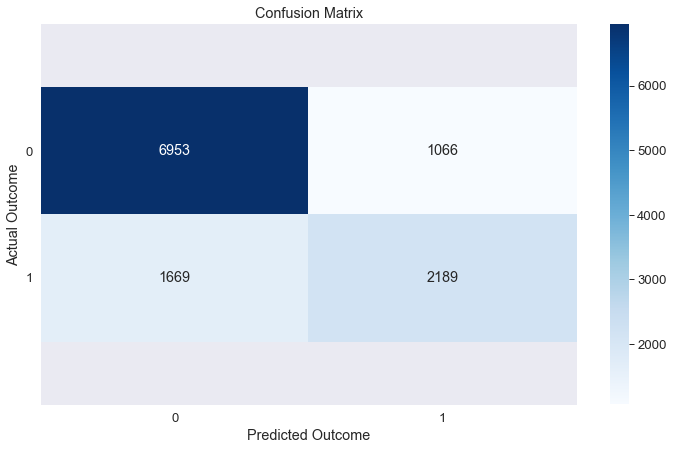

Accuracy score for test data is: 0.7697229940220595
Precession score for test data is: 0.6725038402457757
Recall score for test data is: 0.5673924313115604
F1 score for test data is: 0.6154927597356952

Classification Report for test data is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      8019
           1       0.67      0.57      0.62      3858

    accuracy                           0.77     11877
   macro avg       0.74      0.72      0.73     11877
weighted avg       0.76      0.77      0.76     11877



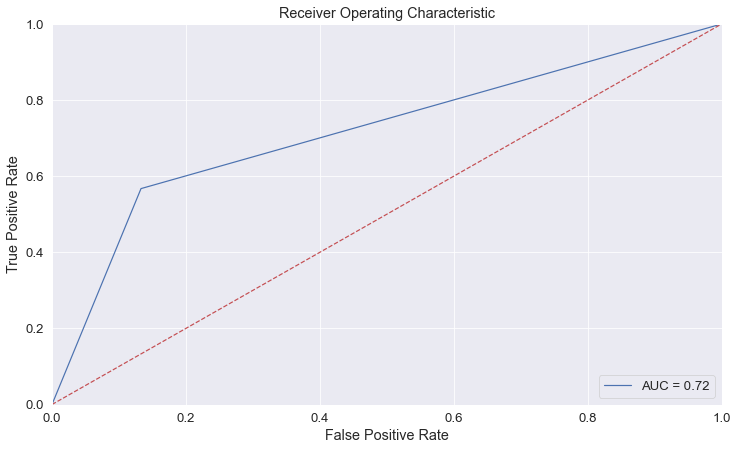

In [71]:
performance_metrics(model=lr_model1, y_pred_test=y_pred_test, 
                    algorithm='Logistic Regression')

- From the above matrix we can see that  the model has done right prediction of total **6953 + 2189 = 9142** and wrong predictions of **1066 + 1669 = 2735**. Our aim is to reduce the wrong prediction (False Positive and False Negative)

- In this case we are considering below performace metrics
    - Accuracy : Snce the data is nearly balanced (which is almost in 60-40 ratio) we can consider Accuracy as one of the performance metrics for this Problem statement
    - Also for this problem statement I am assuming that False Positives and False Negatives have equal importance so we will be considering Precession, Recall and F1 score as well
- Please find the reference of [Performance-Metrics](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b "Performance-Metrics") which I used for this project

In [72]:
Results = pd.DataFrame({
                        'Algorithm' : ['Logistic Regression'], 
                       'Accuracy' : [accuracy_score(y_test, y_pred_test)],
                        'Precission' : [precision_score(y_test, y_pred_test)],
                        'Recall' : [recall_score(y_test, y_pred_test)], 
                        'F1 Score' : [f1_score(y_test, y_pred_test)] })
Results

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Logistic Regression,0.769723,0.672504,0.567392,0.615493


### Hyperparameter Tuning 

### About Hyperparameters
<br> </br>
#### Regularization Methods 
[L1 & L2](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c "L1 & L2"), [Elasticnet](https://en.wikipedia.org/wiki/Elastic_net_regularization "Elasticnet")

<br> </br>
**Parameter C = 1/λ.**

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.¶
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

<br> </br>

#### Solver
The complete details of Solver can be found [here](https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 "here")

In [73]:
#Randomized Search CV

# Regularization Methods 
penalty = ['l1', 'l2', 'elasticnet']

solver = ['newton-cg', 'lbfgs', 'liblinear',  'sag',  'saga']

C = [100, 10, 1.0, 0.1, 0.01]

dual = [True, False]

tol = [1e-4, 1e-3, 1e-2, 1e-5, 1e-6]

max_iter = [25, 50, 75, 100, 125, 150, 175, 200]

In [74]:
random_grid_lr = {'penalty' : penalty, 
                              'solver' : solver,
                              'C' : C,
                             'dual' : dual,
                            'tol' : tol,
                          'max_iter' : max_iter
}

In [76]:
# Random search of parameters, using 5 fold cross validation, 

lr_random = RandomizedSearchCV(estimator = lr_model1, 
                               param_distributions = random_grid_lr, 
                               n_iter = 20, cv = 5, verbose=10, random_state=0, n_jobs = -1)

In [77]:
lr_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  1.6min remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'dual': [True, False],
                                        'max_iter': [25, 50, 75, 100, 125, 150,
                                                     175, 200],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01, 1e-05,
                                                1e-06]},
                   random_state=0, verbose=10)

In [78]:
lr_random.best_params_

{'tol': 1e-06,
 'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 100,
 'dual': False,
 'C': 1.0}

In [79]:
lr_random.best_estimator_

LogisticRegression(random_state=0, solver='liblinear', tol=1e-06)

In [80]:
lr_random.best_score_

0.8132367673208915

In [81]:
grid_search_lr = { 'tol' : [lr_random.best_params_['tol']], 
                           'solver' : [lr_random.best_params_['solver']], 
                          'penalty' : [lr_random.best_params_['penalty']],
                          'max_iter' : [lr_random.best_params_['max_iter'], 
                                       lr_random.best_params_['max_iter'] + 20, 
                                       lr_random.best_params_['max_iter'] -20, 
                                       lr_random.best_params_['max_iter'] +40, 
                                       lr_random.best_params_['max_iter'] -40],
                          'dual' : [lr_random.best_params_['dual']],
                          'C' : [lr_random.best_params_['C'],
                                lr_random.best_params_['C'] + 1,
                                lr_random.best_params_['C'] +2, 
                                lr_random.best_params_['C'] +3, 
                                lr_random.best_params_['C'] +4]                    
}

In [82]:
lr_grid = GridSearchCV(estimator=lr_model1, param_grid=grid_search_lr, 
                                      cv=5, verbose=10, n_jobs=-1)

In [83]:
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 123 out of 125 | elapsed: 10.7min remaining:   10.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 10.9min finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0], 'dual': [False],
                         'max_iter': [100, 120, 80, 140, 60], 'penalty': ['l2'],
                         'solver': ['liblinear'], 'tol': [1e-06]},
             verbose=10)

In [84]:
lr_grid.best_params_

{'C': 2.0,
 'dual': False,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 1e-06}

In [85]:
y_pred_test_lr_grid = lr_grid.predict(X_test)

Performance metrics for Logistic Regression with hyperparameter tuning are as below 


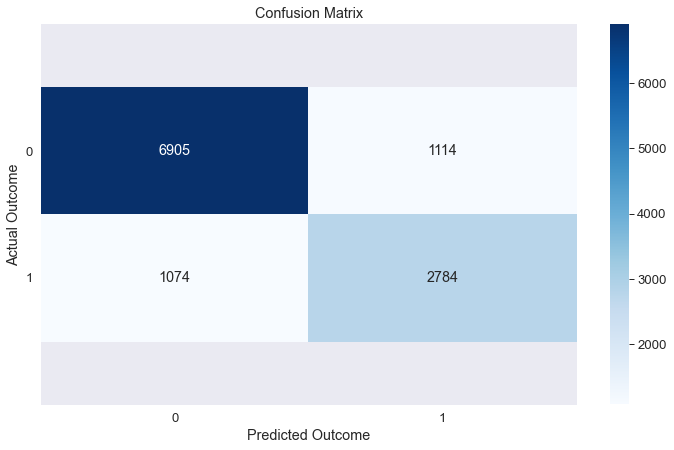

Accuracy score for test data is: 0.8157783952176475
Precession score for test data is: 0.7142124166239097
Recall score for test data is: 0.7216174183514774
F1 score for test data is: 0.7178958225889633

Classification Report for test data is: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      8019
           1       0.71      0.72      0.72      3858

    accuracy                           0.82     11877
   macro avg       0.79      0.79      0.79     11877
weighted avg       0.82      0.82      0.82     11877



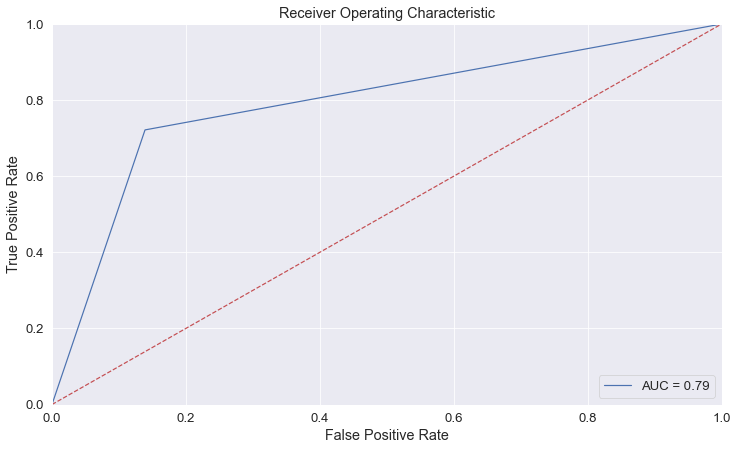

In [86]:
performance_metrics(model=lr_grid, y_pred_test=y_pred_test_lr_grid, 
                    algorithm='Logistic Regression with hyperparameter tuning')

- From the above matrix we can see that  the model has done right prediction of total **6905 + 2784 = 9689** and wrong predictions of **1114 + 1074 = 2188**


In [87]:
Results_lr_grid = pd.DataFrame({
                       'Algorithm' : ['Logistic Regression with Hyperparameter Tuning'], 
                       'Accuracy' : [accuracy_score(y_test, y_pred_test_lr_grid)],
                        'Precission' : [precision_score(y_test, y_pred_test_lr_grid)],
                        'Recall' : [recall_score(y_test, y_pred_test_lr_grid)], 
                        'F1 Score' : [f1_score(y_test, y_pred_test_lr_grid)] })
Results_lr_grid

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Logistic Regression with Hyperparameter Tuning,0.815778,0.714212,0.721617,0.717896


In [88]:
Results = pd.concat([Results, Results_lr_grid], ignore_index=True)

In [89]:
Results

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Logistic Regression,0.769723,0.672504,0.567392,0.615493
1,Logistic Regression with Hyperparameter Tuning,0.815778,0.714212,0.721617,0.717896


 - While concatinating two data frames ignore_index = True will helps to keep the index incremented as we keep on adding the rows. This is quite useful when we tries to access the rows based on index.
     - Reference for incrementing index of dataframe while concatinating is explained [here](https://stackoverflow.com/questions/58631184/appending-2-dataframes-together-and-increment-the-ranks-while-appending "here")

<a name = Section603></a>
### Implementiong [Decision Tree](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052 "Decision Tree") algorithm

In [90]:
dt_model = DecisionTreeClassifier(random_state = 0)

In [91]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [92]:
y_pred_train_dt = dt_model.predict(X_train)

In [93]:
y_pred_test_dt = dt_model.predict(X_test)

Performance metrics for Decission Tree are as below 


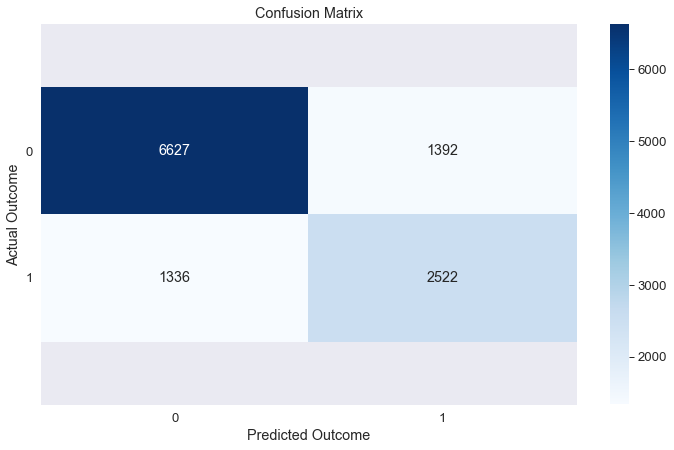

Accuracy score for test data is: 0.7703123684432096
Precession score for test data is: 0.6443536024527338
Recall score for test data is: 0.6537065837221359
F1 score for test data is: 0.6489963973237262

Classification Report for test data is: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      8019
           1       0.64      0.65      0.65      3858

    accuracy                           0.77     11877
   macro avg       0.74      0.74      0.74     11877
weighted avg       0.77      0.77      0.77     11877



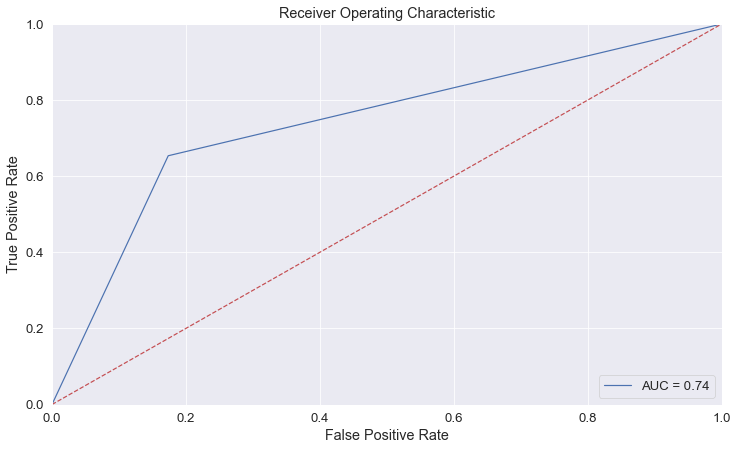

In [94]:
performance_metrics(model=dt_model, y_pred_test=y_pred_test_dt, 
                    algorithm='Decission Tree')

- From the above matrix we can see that  the model has done right prediction of total **6627 + 2522 = 9149** and wrong predictions of **1392 + 1336 = 2728**.

In [95]:
Results_dt = pd.DataFrame({'Algorithm' : ['Decision Tree'], 
                       'Accuracy' : [accuracy_score(y_test, y_pred_test_dt)],
                        'Precission' : [precision_score(y_test, y_pred_test_dt)],
                        'Recall' : [recall_score(y_test, y_pred_test_dt)], 
                        'F1 Score' : [f1_score(y_test, y_pred_test_dt)] })
Results_dt

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Decissio Tree,0.770312,0.644354,0.653707,0.648996


In [96]:
Results = pd.concat([Results, Results_dt], ignore_index=True)
Results

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Logistic Regression,0.769723,0.672504,0.567392,0.615493
1,Logistic Regression with Hyperparameter Tuning,0.815778,0.714212,0.721617,0.717896
2,Decissio Tree,0.770312,0.644354,0.653707,0.648996


### Hyperparameter Tuning 

The details of Hyperparameters for Decission Tree are explained [here](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680 "here")

In [97]:
#Randomized Search CV

# criterion : The function to measure the quality of a split. 
criterion = ['gini', 'entropy']

# splitter : The strategy used to choose the split at each node
splitter = ['best', 'random']

# max_depth : The maximum depth of the tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# min_samples_split : The minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10, 15, 100]

# min_samples_leaf : The minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 5, 10]

# max_features : The number of features to consider when looking for the best split:
max_features = ['auto', 'sqrt',  'log2', 'None']

scores = {'precision_score': make_scorer(precision_score),
  'recall_score': make_scorer(recall_score),
 'accuracy_score': make_scorer(accuracy_score)
}

In [98]:
random_grid_dt = {'criterion' : criterion, 
                              'splitter' : splitter,
                              'max_depth' : max_depth,
                             'min_samples_split' : min_samples_split,
                            'min_samples_leaf' : min_samples_leaf,
                          'max_features' : max_features
}

In [99]:
# Random search of parameters, using 10 fold cross validation, 

dt_random = RandomizedSearchCV(estimator = dt_model, 
                               param_distributions = random_grid_dt, 
                               n_iter = 60, cv = 10, verbose=10, random_state=0, n_jobs = -1)

In [100]:
dt_random.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'splitter': ['best', 'random']},
                   random_state=0, verbose=10)

In [101]:
dt_random.best_params_

{'splitter': 'best',
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'entropy'}

In [102]:
dt_random.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=15,
                       random_state=0)

In [103]:
dt_random.best_score_

0.7865658155069847

In [104]:
grid_search_dt = {'splitter' : [dt_random.best_params_['splitter']],
                            'min_samples_split' : [dt_random.best_params_['min_samples_split'],
                                                             dt_random.best_params_['min_samples_split'] +25,
                                                             dt_random.best_params_['min_samples_split'] -25,
                                                             dt_random.best_params_['min_samples_split'] +50,
                                                            dt_random.best_params_['min_samples_split'] -50],
                          'min_samples_leaf' : [dt_random.best_params_['min_samples_leaf'], 
                                                           dt_random.best_params_['min_samples_leaf'] +1,
                                                           dt_random.best_params_['min_samples_leaf'] +2,
                                                           dt_random.best_params_['min_samples_leaf'] +4, 
                                                           dt_random.best_params_['min_samples_leaf'] +5],
                          'max_features' : [dt_random.best_params_['max_features']],
                          'max_depth'   :  [dt_random.best_params_['max_depth'], 
                                                   dt_random.best_params_['max_depth'] +25,
                                                   dt_random.best_params_['max_depth'] +50,
                                                   dt_random.best_params_['max_depth'] +75,
                                                   dt_random.best_params_['max_depth'] +100],
                          'criterion'   : [dt_random.best_params_['criterion']]
            
}

In [105]:
dt_grid = GridSearchCV(estimator=dt_model, param_grid=grid_search_dt, cv=5,
                                                      verbose=10, n_jobs=-1)

In [106]:
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [25, 50, 75, 100, 125],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 11, 12, 14, 15],
                         'min_samples_split': [15, 40, -10, 65, -35],
                         'splitter': ['best']},
             verbose=10)

In [107]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 12,
 'min_samples_split': 65,
 'splitter': 'best'}

In [108]:
y_pred_test_dt_grid = dt_grid.predict(X_test)

Performance metrics for Decission Tree with hyperparameter tuning are as below 


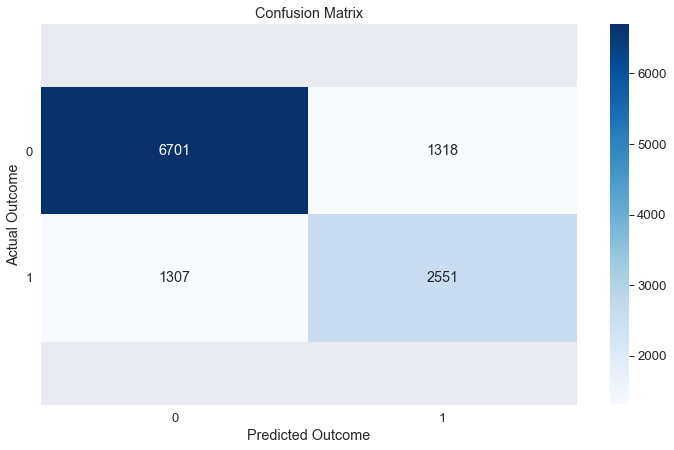

Accuracy score for test data is: 0.7789845920687042
Precession score for test data is: 0.6593434996123029
Recall score for test data is: 0.6612234318299637
F1 score for test data is: 0.6602821276045037

Classification Report for test data is: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      8019
           1       0.66      0.66      0.66      3858

    accuracy                           0.78     11877
   macro avg       0.75      0.75      0.75     11877
weighted avg       0.78      0.78      0.78     11877



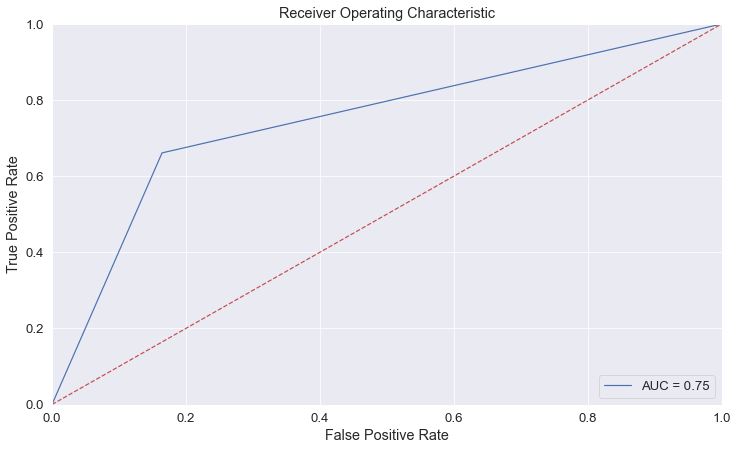

In [109]:
performance_metrics(model=dt_grid, y_pred_test=y_pred_test_dt_grid, 
                    algorithm='Decission Tree with hyperparameter tuning')

- From the above matrix we can see that  the model has done right prediction of total **6701 + 2551 = 9252** and wrong predictions of **1318 + 1307 = 2625**. 

In [110]:
Results_dt_grid = pd.DataFrame({'Algorithm' : ['Decision Tree with Hyperparameter Tuning'], 
                       'Accuracy' : [accuracy_score(y_test, y_pred_test_dt_grid)],
                        'Precission' : [precision_score(y_test, y_pred_test_dt_grid)],
                        'Recall' : [recall_score(y_test, y_pred_test_dt_grid)], 
                        'F1 Score' : [f1_score(y_test, y_pred_test_dt_grid)] })
Results_dt_grid

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Decissio Tree with Hyperparameter Tuning,0.778985,0.659343,0.661223,0.660282


In [111]:
Results = pd.concat([Results, Results_dt_grid], ignore_index=True)
Results

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Logistic Regression,0.769723,0.672504,0.567392,0.615493
1,Logistic Regression with Hyperparameter Tuning,0.815778,0.714212,0.721617,0.717896
2,Decissio Tree,0.770312,0.644354,0.653707,0.648996
3,Decissio Tree with Hyperparameter Tuning,0.778985,0.659343,0.661223,0.660282


<a name = Section604></a>
### Implementing [Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2 "Random Forest") algorithm

In [112]:
rf_model = RandomForestClassifier(random_state=0)

In [113]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [114]:
y_pred_train_rf = rf_model.predict(X_train)

In [115]:
y_pred_test_rf = rf_model.predict(X_test)

Performance metrics for Random Forest are as below 


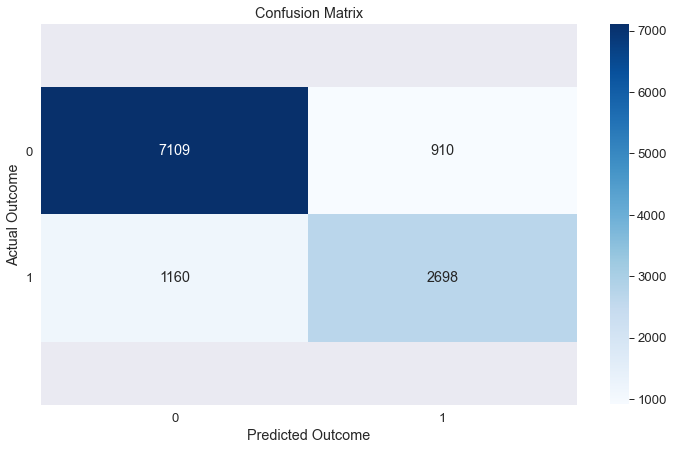

Accuracy score for test data is: 0.825713564031321
Precession score for test data is: 0.7477827050997783
Recall score for test data is: 0.6993260756868844
F1 score for test data is: 0.7227431020626842

Classification Report for test data is: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      8019
           1       0.75      0.70      0.72      3858

    accuracy                           0.83     11877
   macro avg       0.80      0.79      0.80     11877
weighted avg       0.82      0.83      0.82     11877



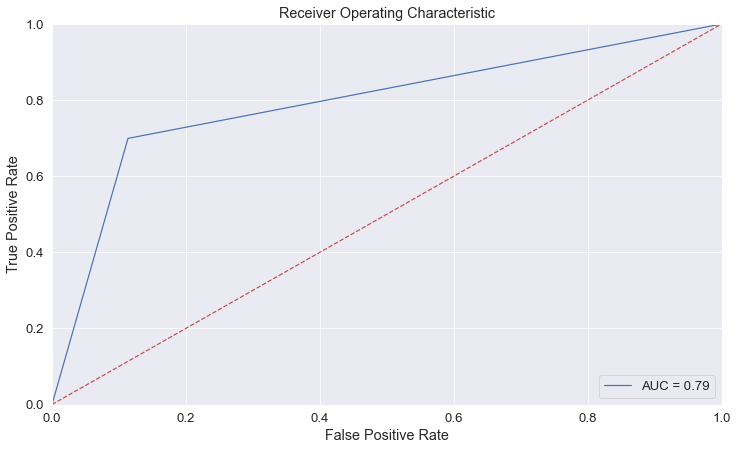

In [116]:
performance_metrics(model=rf_model, y_pred_test=y_pred_test_rf, algorithm='Random Forest')

- From the above matrix we can see that  the model has done right prediction of total **7109 + 2698 = 9807** and wrong predictions of **910 + 1160 = 2070**. 

In [117]:
Results_rf = pd.DataFrame({'Algorithm' : ['Random Forest'], 
                       'Accuracy' : [accuracy_score(y_test, y_pred_test_rf)],
                        'Precission' : [precision_score(y_test, y_pred_test_rf)],
                        'Recall' : [recall_score(y_test, y_pred_test_rf)], 
                        'F1 Score' : [f1_score(y_test, y_pred_test_rf)] })
Results_rf

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Random Forest,0.825714,0.747783,0.699326,0.722743


In [118]:
Results = pd.concat([Results, Results_rf], ignore_index=True)
Results

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Logistic Regression,0.769723,0.672504,0.567392,0.615493
1,Logistic Regression with Hyperparameter Tuning,0.815778,0.714212,0.721617,0.717896
2,Decissio Tree,0.770312,0.644354,0.653707,0.648996
3,Decissio Tree with Hyperparameter Tuning,0.778985,0.659343,0.661223,0.660282
4,Random Forest,0.825714,0.747783,0.699326,0.722743


### Hyperparameter Tuning 

Hyperparameters for Random Forest alogorith are explained [here](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 "here")

<br> </br>

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 20 and 5 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [119]:
# RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


In [120]:
random_grid_rf = {'n_estimators' : n_estimators,
                            'max_features' : max_features,
                            'max_depth' : max_depth,
                          'min_samples_split' : min_samples_split,
                          'min_samples_leaf' : min_samples_leaf
}

In [122]:
# Random search of parameters, using 5 fold cross validation 

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid_rf, 
                                          n_iter=20, cv=5, verbose=10, n_jobs=-1)

In [123]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  7.5min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   verbose=10)

In [124]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [125]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=300,
                       random_state=0)

In [126]:
rf_random.best_score_

0.8252146710318581

In [127]:
grid_search_rf = { 'n_estimators' : [rf_random.best_params_['n_estimators'], 
                                                    rf_random.best_params_['n_estimators'] +50,
                                                    rf_random.best_params_['n_estimators'] -50], 
                          'min_samples_split' : [rf_random.best_params_['min_samples_split'], 
                                                            rf_random.best_params_['min_samples_split'] -2,
                                                            rf_random.best_params_['min_samples_split'] +2],
                          'min_samples_leaf' : [rf_random.best_params_['min_samples_leaf'], 
                                                           rf_random.best_params_['min_samples_leaf'] +2,
                                                           rf_random.best_params_['min_samples_leaf'] +4],
                          'max_features' : [rf_random.best_params_['max_features']],
                          'max_depth' : [rf_random.best_params_['max_depth'], 
                                                rf_random.best_params_['max_depth'] +15,
                                                rf_random.best_params_['max_depth'] +20]
    
}

In [128]:
rf_grid = GridSearchCV(estimator=rf_model, param_grid=grid_search_rf, cv=5,
                                                      verbose=10, n_jobs=-1)

In [129]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 34

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [30, 45, 50], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [10, 8, 12],
                         'n_estimators': [300, 350, 250]},
             verbose=10)

In [130]:
rf_grid.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 350}

In [131]:
y_pred_test_rf_grid = rf_grid.predict(X_test)

Performance metrics for Random Forest with hyperparameter tuning are as below 


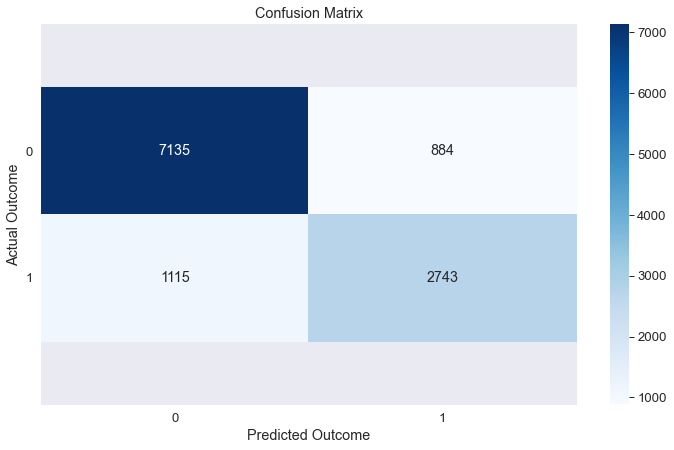

Accuracy score for test data is: 0.8316915045887009
Precession score for test data is: 0.7562724014336918
Recall score for test data is: 0.7109901503369621
F1 score for test data is: 0.7329325317301268

Classification Report for test data is: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      8019
           1       0.76      0.71      0.73      3858

    accuracy                           0.83     11877
   macro avg       0.81      0.80      0.81     11877
weighted avg       0.83      0.83      0.83     11877



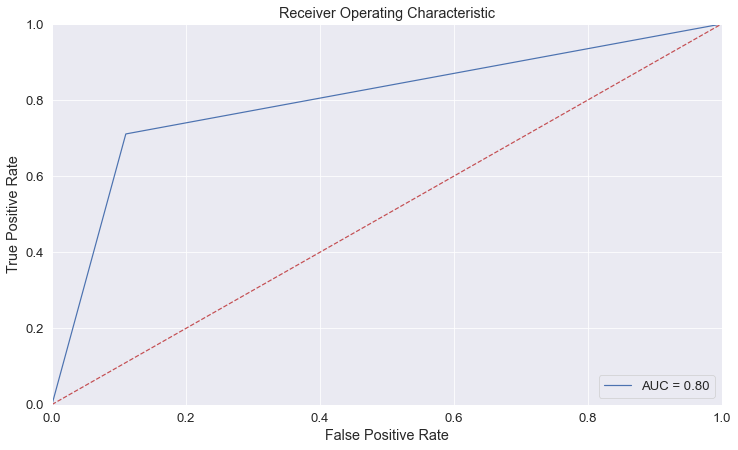

In [132]:
performance_metrics(model=rf_grid, y_pred_test=y_pred_test_rf_grid, 
                    algorithm='Random Forest with hyperparameter tuning')

- From the above matrix we can see that  the model has done right prediction of total **7135 + 2743 = 9878** and wrong predictions of **884 + 1115 = 1999**. 

In [133]:
Results_rf_grid = pd.DataFrame({'Algorithm' : ['Random Forest with Hyperparameter Tuning'], 
                       'Accuracy' : [accuracy_score(y_test, y_pred_test_rf_grid)],
                        'Precission' : [precision_score(y_test, y_pred_test_rf_grid)],
                        'Recall' : [recall_score(y_test, y_pred_test_rf_grid)], 
                        'F1 Score' : [f1_score(y_test, y_pred_test_rf_grid)] })
Results_rf_grid

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Random Forest with Hyperparameter Tuning,0.831692,0.756272,0.71099,0.732933


<a name = Section701></a>
# Model Comparission

In [134]:
Results = pd.concat([Results, Results_rf_grid], ignore_index=True)
Results

,Algorithm,Accuracy,Precission,Recall,F1 Score
0,Logistic Regression,0.769723,0.672504,0.567392,0.615493
1,Logistic Regression with Hyperparameter Tuning,0.815778,0.714212,0.721617,0.717896
2,Decissio Tree,0.770312,0.644354,0.653707,0.648996
3,Decissio Tree with Hyperparameter Tuning,0.778985,0.659343,0.661223,0.660282
4,Random Forest,0.825714,0.747783,0.699326,0.722743
5,Random Forest with Hyperparameter Tuning,0.831692,0.756272,0.710990,0.732933
